In [4]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import sys

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [1]:
import matplotlib.image as mpimg

test_png = mpimg.imread("sample_data/test_img.png")

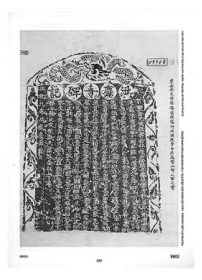

In [5]:
# Define a sharpening kernel
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply the kernel to each channel
sharpened_img = np.zeros_like(test_png)
for c in range(3):
    sharpened_img[..., c] = np.clip(
        F.conv2d(
            torch.tensor(test_png[..., c][None, None, ...], dtype=torch.float32),
            torch.tensor(sharpen_kernel[None, None, ...], dtype=torch.float32),
            padding=1,
        )
        .squeeze()
        .numpy(),
        0,
        1,
    )

plt.imshow(sharpened_img)
plt.axis("off")
plt.show()